In [1]:
""" Proposition of numerical study
    [Prosit 2 ('interville'), mecanics, CPI A1]
    > nb_prosit-2_mecanics_cpi-a1.ipynb
-----------------------------------------------
author: Antoine Boulet
        (aboulet@ismans.cesi.fr)
date: 2022-01-06
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
# import tikzplotlib

In [2]:

# implementation (recurcive) of the exact solution  (valid for H_n > R_b)
# (can also be implemented iteratively, cf. exact solution)
def H(n, mx, mb = 5.0, mc = 15.0, f = 60.0, g = 9.81, H0 = 4.0, L = 3.0, Ra = 0.2, Rb = 1.8, h = 2.0):
    """ Function that return H_n (defined in the note, exact solution in appendix of the notes)
        as a function of the player's mass mx [in SI units]
        --------------
        optional args: 
            correspond to the definition of the fixed variables [in SI units]
            assigned to default values as predefined variables of the function
    """   
    
    # return (recursive) formula found in the notes
    if n < 0: return 0
    elif n == 0: return H0
    else: 
        # define the masses of the system with or without the ball
        mm = mx + mc      # m_-
        mp = mx + mc + mb # m_+
            
        # define the intermediate length of the trajectory path
        Ln = L + (np.pi / 2.0 - 1.0) * (2.0 * Rb + np.kron(0, n) * Ra)
    
        # define others notations (in order to be able to take the limit f = 0)
        A = (g * mp - f) / (g * mm + f)
        B = f * Ln / (g * mm + f) # \epsilon_n in the notes

        # return results (valid for H_n > R_b)
        return A * H(n - 1, mx, mb, mc, f, g, H0, L, Ra, Rb, h) - B


Masse maximale du joueur = 61 kg


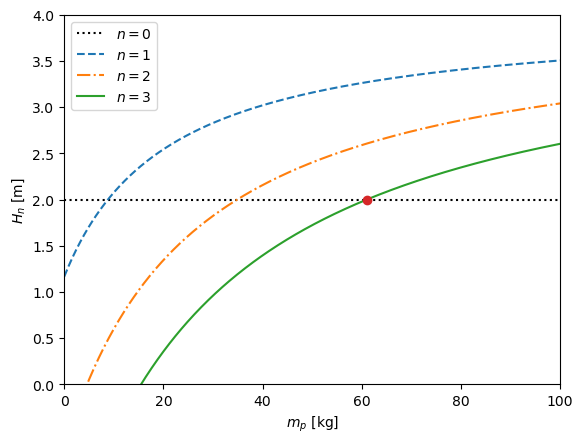

In [3]:
""" Solver: found solution, i.e. maximal mass, such that H_3 < h
"""
h = 2.0
m_max = fsolve(lambda m : H(3, m) - h, 100)[0]
print('Masse maximale du joueur =', round(m_max), 'kg')


""" Plot figure H_n = f(m)
"""

M = np.linspace(0, 100, 500)

plt.figure()

plt.plot(M, h * np.ones(M.size), ':', label = r'$n = 0$', color = 'k')
plt.plot(M, H(1, M), '--', label = r'$n = 1$')
plt.plot(M, H(2, M), '-.', label = r'$n = 2$')
plt.plot(M, H(3, M), '-', label = r'$n = 3$')
plt.plot(m_max, H(3, m_max), 'o')

plt.xlabel(r'$m_p ~ [\mathrm{kg}]$')
plt.ylabel(r'$H_n ~ [\mathrm{m}]$')

plt.xlim(0, 100)
plt.ylim(0, 4)

plt.legend()

# tikzplotlib.save('file1.tex')

plt.show()

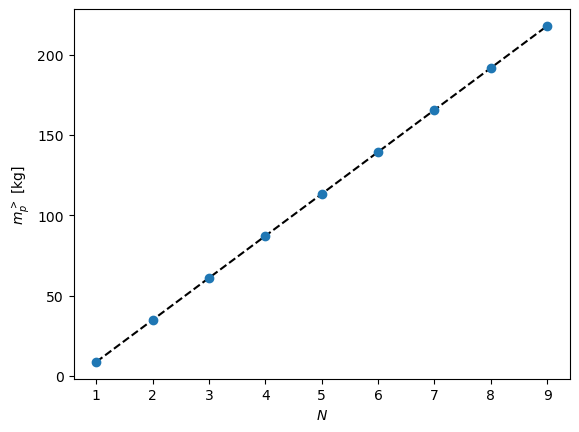

In [4]:
""" Solver: found solution, i.e. maximal mass, such that H_N < h
"""
h = 2.0; N_ = range(1, 10)
M_MAX = [fsolve(lambda m : H(n, m) - h, 100)[0] for n in N_]

""" Plot figure M_MAX = f(N)
"""
plt.figure()

fit_coef = np.polyfit(N_, M_MAX, 1); poly1d_M_MAX = np.poly1d(fit_coef) # linear fit, cf. https://stackoverflow.com/a/6148315

plt.plot(N_, poly1d_M_MAX(N_), '--k')
plt.plot(N_, M_MAX, 'o')

plt.ylabel(r'$m_p^> ~ [\mathrm{kg}]$')
plt.xlabel(r'$N$')

# tikzplotlib.save('file2.tex')

plt.show()

In [5]:
# **bonus: exact solution**

# intermediate function that depend on H_n and H_{n+1} (angle theta)
def theta(R, H):
    if H <= R: return np.arctan(1.0 / (1.0 - H / R))
    else: return np.pi / 2.0
# intermediate function that depend on H_n and H_{n+1} (length \delta \lambda)
def delta(R, H):
    if H > R: return H - R
    else: return 0.0

# intermediate function that depend on H_n (m_+ and m_-)
def mass(H, mx, mb = 5.0, mc = 15.0, h = 2.0):
    if H >= h: return mx + mc + mb, mx + mc
    else: return mx + mc, mx + mc

# implementation (iterative) of the exact solution (valid for H_n > 0)
def S(n, mx, mb = 5.0, mc = 15.0 , f = 60.0, g = 9.81, H0 = 4.0, L = 3.0, Ra = 0.2, Rb = 1.8, h = 2.0):
    """ Function that return H_n (defined in the note, exact solution in appendix of the notes)
        as a function of the player's mass mx [in SI units]
        --------------
        optional args: 
            correspond to the definition of the fixed variables [in SI units]
            assigned to default values as predefined variables of the function
    """  

    if n < 0: return 0.0
    elif n == 0: return H0
    else:

        # calculate the series of hp (H_i) from i = 1 to i = n iteratively
        hp = H0 # initialisation 
        for i in range(0, n):
            def Delta_Ec(hp, hm):
                # define the masses of the system with or without the ball
                mp, mm = mass(hp, mx, mb, mc, h) # (m_+, m_-)

                # define the angle that define the length path in the circular motions
                tp, tm = theta(Rb, hp), theta(Rb, hm) # (theta_+, theta_-)
                
                # define the intermediate length of the trajectory path
                Ln = L + (np.pi / 2.0 - 1.0) * np.kron(0, i) * Ra + (tp + tm) * Rb + delta(Rb, hp) + delta(Rb, hm)

                # return the sum of works done by external forces 
                # (= 0 in the case considered according to the theorem of kinetic energy)
                return g * (mp * hp - mm * hm) - f * Ln # = \Delta E_c

            # found solution H_i such that \Delta E_c = 0  
            hp = fsolve(lambda hm : Delta_Ec(hp, hm), 2.0)[0] # initialise next step of the for loop
        
        # return results (valid for H_n > 0)
        if hp < 0: return 0.0
        else: return hp

# useful to plot with matplotlib (works as the H function)
def K(n, Mx, mb = 5.0, mc = 15.0 , f = 60.0, g = 9.81, H0 = 4.0, L = 3.0, Ra = 0.2, Rb = 1.8, h = 2.0):
    return [S(n, mx, mb, mc, f, g, H0, L, Ra, Rb, h) for mx in Mx]

Masse maximale du joueur = 61 kg


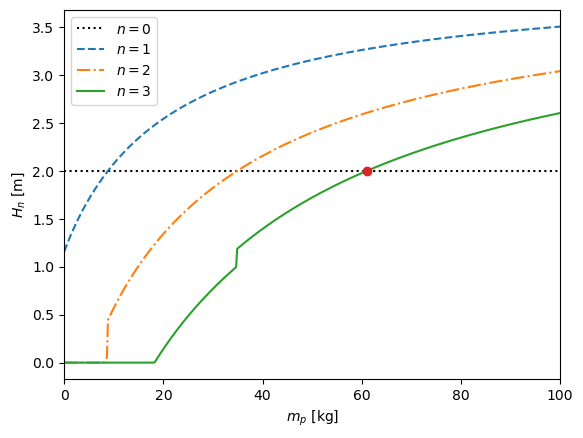

In [6]:
""" Solver: found solution, i.e. maximal mass, such that H_3 < h
"""
h = 2.0
m_max = fsolve(lambda m : S(3, m) - h, 100)[0]
print('Masse maximale du joueur =', round(m_max), 'kg')


""" Plot figure H_n = f(m)
"""

M = np.linspace(0, 100, 500)

plt.figure()

plt.plot(M, h * np.ones(M.size), ':', label = r'$n = 0$', color = 'k')
plt.plot(M, K(1, M), '--', label = r'$n = 1$') # or with H(1, M)
plt.plot(M, K(2, M), '-.', label = r'$n = 2$') # or with H(2, M)
plt.plot(M, K(3, M), '-', label = r'$n = 3$')  # or with H(3, M)
plt.plot(m_max, S(3, m_max), 'o')

plt.xlabel(r'$m_p ~ [\mathrm{kg}]$')
plt.ylabel(r'$H_n ~ [\mathrm{m}]$')

plt.xlim(0, 100)

plt.legend()

plt.show()

In [7]:
def G(mx, mb = 5.0, mc = 15.0, f = 60.0, g = 9.81, H0 = 4.0, L = 3.0, Ra = 0.2, Rb = 1.8, h = 2.0):
    """ find position of the player after the last way down
        k: label of the last trajectory
        H: initial altitude of the trajectory
        x: final position after the last way down
        v: velocity at the end of the last circular way down
    """ 
    
    # found k such that H_k > 0 and H_{k+1} = 0
    for n in range(0, 50):
        if S(n, mx, mb, mc, f, g, H0, L, Ra, Rb, h) < 1e-6:
            k = n-1
            H = S(n-1, mx, mb, mc, f, g, H0, L, Ra, Rb, h)
            break

    # define the masses of the system with or without the ball
    mp, mm = mass(H, mx, mb, mc, h) # (m_+, m_-)

    # calculate velocity at the end of the last way down 
    # (assuming vanishing friction force for v = 0)
    v = 2.0 / mp * np.sqrt(max(mp * g * H - f * (theta(Rb, H) * Rb + delta(Rb, H)), 0.0))

    # calculate postition of zero velocity after the last way down
    x = (1.0 / 2.0) * mp * v**2 / f
        
    return k, H, x, v

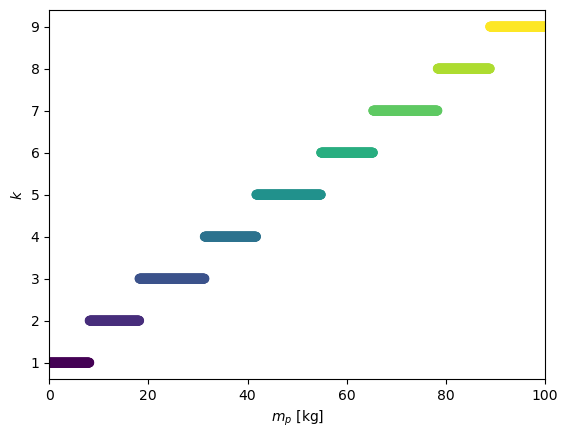

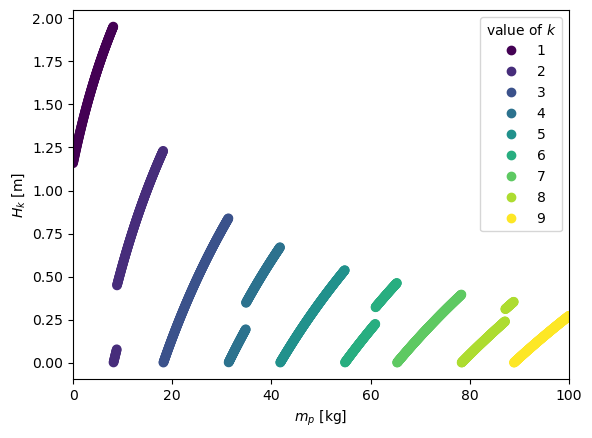

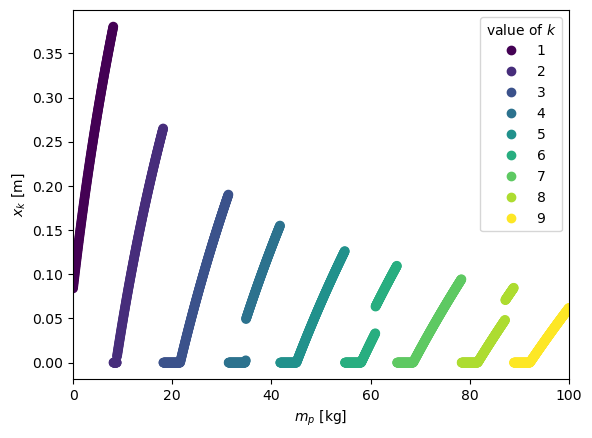

In [8]:
""" Several plots
"""
M = np.linspace(0, 100, 2000)

k_ = []; Hk_ = []; xk_ = []; vk_ = []
for m in M: G_ = G(m); k_ += [G_[0]]; Hk_ += [G_[1]]; xk_ += [G_[2]]; vk_ += [G_[3]]

""" Plot figure k = f(m)
"""
plt.figure()
scatter = plt.scatter(M, k_, c = k_)
plt.xlabel(r'$m_p ~ [\mathrm{kg}]$')
plt.ylabel(r'$k$')
plt.xlim(0, 100)
plt.show()

""" Plot figure H_k = f(m)
"""
plt.figure()
scatter = plt.scatter(M, Hk_, c = k_)
plt.xlabel(r'$m_p ~ [\mathrm{kg}]$')
plt.ylabel(r'$H_k ~ [\mathrm{m}]$')
plt.xlim(0, 100)
plt.legend(*scatter.legend_elements(), title = 'value of $k$')

plt.show()

""" Plot figure x_k = f(m)
"""
plt.figure()
scatter = plt.scatter(M, xk_, c = k_)
plt.xlabel(r'$m_p ~ [\mathrm{kg}]$')
plt.ylabel(r'$x_k ~ [\mathrm{m}]$')
plt.xlim(0, 100)
plt.legend(*scatter.legend_elements(), title = 'value of $k$')
plt.show()